<div style="
    background-color: #1DB954; 
    color: white; 
    text-align: center; 
    padding: 20px; 
    border-radius: 10px;
    font-size: 24px;">
    <strong>🎵 Spotify Data Analysis 🎵</strong>
</div>


<div style="
    background-color: #191414; 
    color: #1DB954; 
    padding: 20px; 
    border: 2px solid #1ED760; 
    border-radius: 10px; 
    font-family: Arial, sans-serif;
    font-size: 16px;">

# **Introduction**

I'm just doing a fun exploratory analysis to see what insights I can come up with with no guidance. I'll be mainly demonstrating data cleaning, data analysis, data visualization, and not relying on SQL so much to become more efficient with Python functions.

# **About the Data**

The dataset contains information about 952 Spotify tracks, covering various attributes such as song metadata, release details, and audio features. Here's a breakdown of the key elements:

---

## **1. Metadata**
- **Track Name**: The name of the song.
- **Artist**: The name(s) of the artist(s) associated with the track.
- **Artist Count**: Number of artists contributing to the track.

---

## **2. Release Information**
- **Released Year**: Year the track was released.
- **Released Month**: Month of release.
- **Released Day**: Day of release.

---

## **3. Popularity Metrics**
- **Streams**: The number of times the track has been streamed on Spotify.
- **In Spotify Playlists**: Number of Spotify playlists the track appears in.
- **In Spotify Charts**: Number of times the track has been included in Spotify's top charts.

---

## **4. Audio Features**
- **BPM (Beats Per Minute)**: Tempo of the track.
- **Mode**: Indicates whether the track is in a major or minor key.
- **Danceability (%):** How suitable the track is for dancing, measured on a scale of 0-100.
- **Valence (%):** Positivity of the track, with higher values being more positive.
- **Energy (%):** Intensity and activity level of the track.
- **Acousticness (%):** Degree of acoustic sound in the track.
- **Instrumentalness (%):** Likelihood of the track being instrumental.
- **Liveness (%):** Presence of a live audience sound.
- **Speechiness (%):** Measure of spoken words within the track.

---

## **5. Track Duration**
- **Duration**: Length of the track in seconds.
- **Duration Minutes**: Derived feature showing track length in minutes for easier interpretation.

---

## **Potential Insights**
This dataset provides rich ground for exploratory analysis, including:
- Popularity trends and factors driving streams and playlist inclusions.
- Relationships between audio features like energy, valence, and danceability.
- Insights into artist performance and top tracks.
- Temporal trends across release years and their impact on features like BPM and energy.

</div>



# Importing Libraries and Getting the Data

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Markdown #I like to separate outputs clearly.
import warnings
warnings.filterwarnings("ignore")

print("libraries installed!")

libraries installed!


<div style="
    background-color: #191414; 
    color: #1DB954; 
    padding: 20px; 
    border: 2px solid #1ED760; 
    border-radius: 10px; 
    font-family: Arial, sans-serif;
    font-size: 16px;">
The cell below was my process to get the song durations that were missing from the original dataset. I connected to the Spotify API and requested the durations for each song in the dataset by using a loop.
</div>

In [74]:
#Import the dataset into the notebook and assign it to a Dataframe variable.
#df = pd.read_csv('/kaggle/input/spotify-dataset/spotify-dataset.csv', encoding="ISO-8859-1")
#pd.set_option('display.max_columns', None)

#import requests

#Spotify API credentials
#client_id = '1' #not my actual creds
#client_secret = '12'

#Authenticate with Spotify
#auth_url = 'https://accounts.spotify.com/api/token'
#auth_response = requests.post(auth_url, {
#    'grant_type': 'client_credentials',
#    'client_id': client_id,
#   'client_secret': client_secret,
#})
#access_token = auth_response.json()['access_token']

#def get_song_duration(song_title, artist_name):
#    search_url = "https://api.spotify.com/v1/search"
#    headers = {
#        'Authorization': f'Bearer {access_token}'
#    }
#    params = {
#        'q': f'track:{song_title} artist:{artist_name}',
#        'type': 'track',
#        'limit': 1  # Fetch only the most relevant result
#    }
#    response = requests.get(search_url, headers=headers, params=params)
#    data = response.json()
#    
#    try:
        #Extract duration (in milliseconds) and convert to seconds
#         return data['tracks']['items'][0]['duration_ms'] / 1000
#     except (IndexError, KeyError):
#         return None  #Return None if no match is found

# #Add a new column for song durations
# df['duration_seconds'] = df.apply(
#     lambda row: get_song_duration(row['track_name'], row['artist(s)_name']), axis=1
# )

# #Save the updated dataset
# df.to_csv('updated_dataset_with_durations.csv', index=False)


In [75]:
df = pd.read_csv('/kaggle/input/spotify-dataset-with-duration/updated_dataset_with_durations.csv')

pd.set_option('display.max_columns', None)

In [76]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,duration_seconds
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4,183.550
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4,197.920
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6,219.724
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15,178.426
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6,231.704


<div style="
    background-color: #191414; 
    color: #1DB954; 
    padding: 20px; 
    border: 2px solid #1ED760; 
    border-radius: 10px; 
    font-family: Arial, sans-serif;
    font-size: 16px;">
Observations

- Periods in song titles
- non-standard capitalization in song names and artist names
- unnecessary columns for the analysis
- I want integers for the durations
- I also want to move the duration column towards the front of the columns
<div></div>

<div style="
    background-color: #191414; 
    color: #1DB954; 
    padding: 20px; 
    border: 2px solid #1ED760; 
    border-radius: 10px; 
    font-family: Arial, sans-serif;
    font-size: 16px;">
    
# **Data Cleaning and Pre-Processing**
    
<div>

In [77]:
df.shape

(953, 25)

In [78]:
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%',
       'duration_seconds'],
      dtype='object')

In [79]:
df.drop(['in_apple_playlists', 'in_apple_charts',
         'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'key'],
        axis=1, inplace=True, errors='ignore')


In [80]:
#Preliminary whitespace cleanup
df = df.map(lambda x: x.strip() if isinstance(x, str) else x)


In [81]:
display(df.dtypes)

track_name               object
artist(s)_name           object
artist_count              int64
released_year             int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                  object
bpm                       int64
mode                     object
danceability_%            int64
valence_%                 int64
energy_%                  int64
acousticness_%            int64
instrumentalness_%        int64
liveness_%                int64
speechiness_%             int64
duration_seconds        float64
dtype: object

In [82]:
#lower all of the cases
df = df.map(lambda x: x.lower() if isinstance(x, str) else x)
display(df.head())

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,duration_seconds
0,seven (feat. latto) (explicit ver.),"latto, jung kook",2,2023,7,14,553,147,141381703,125,major,80,89,83,31,0,8,4,183.550
1,lala,myke towers,1,2023,3,23,1474,48,133716286,92,major,71,61,74,7,0,10,4,197.920
2,vampire,olivia rodrigo,1,2023,6,30,1397,113,140003974,138,major,51,32,53,17,0,31,6,219.724
3,cruel summer,taylor swift,1,2019,8,23,7858,100,800840817,170,major,55,58,72,11,0,11,15,178.426
4,where she goes,bad bunny,1,2023,5,18,3133,50,303236322,144,minor,65,23,80,14,63,11,6,231.704


In [83]:
#We'll remove the periods by looping the function in columns that contain text data types (object and string).
for col in df.select_dtypes(include=['object', 'string']).columns:
    df[col] = df[col].str.replace('.', '', regex=False)
#Check my work
df.head(1)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,duration_seconds
0,seven (feat latto) (explicit ver),"latto, jung kook",2,2023,7,14,553,147,141381703,125,major,80,89,83,31,0,8,4,183.55


In [84]:
df.insert(loc=2, column='duration', value=df['duration_seconds'])


In [85]:
df.drop('duration_seconds', axis=1, inplace=True)

In [86]:
duration_nulls = df[df['duration'].isnull()]
duration_nulls.groupby("artist(s)_name").size()

artist(s)_name
(g)i-dle                   1
21 savage, gunna           1
24kgoldn, iann dior        1
adele                      2
aerosmith                  1
                          ..
yeat                       1
yoasobi                    1
yuridia, angela aguilar    1
zï¿½ï¿½ fe                 1
zï¿½ï¿½ neto & crist       1
Length: 301, dtype: int64

In [87]:
#Group by artist and calculate the mean duration (ignoring NaN)
artist_avg_duration = df.groupby("artist(s)_name")["duration"].mean()

#Replace NaN values in the duration column
df["duration"] = df.apply(
    lambda row: artist_avg_duration[row["artist(s)_name"]] if pd.isnull(row["duration"]) else row["duration"], 
    axis=1
)
df.isnull().sum()

track_name                0
artist(s)_name            0
duration                248
artist_count              0
released_year             0
released_month            0
released_day              0
in_spotify_playlists      0
in_spotify_charts         0
streams                   0
bpm                       0
mode                      0
danceability_%            0
valence_%                 0
energy_%                  0
acousticness_%            0
instrumentalness_%        0
liveness_%                0
speechiness_%             0
dtype: int64

In [88]:
#Calculate global average duration (ignoring NaN)
global_avg_duration = df["duration"].mean()

#Replace NaN in artist_avg_duration with global average
artist_avg_duration = artist_avg_duration.fillna(global_avg_duration)

df["duration"] = df.apply(
    lambda row: artist_avg_duration[row["artist(s)_name"]] if pd.isnull(row["duration"]) else row["duration"], 
    axis=1
)

In [89]:
df.isnull().sum()

track_name              0
artist(s)_name          0
duration                0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
bpm                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

In [90]:
#Use str.isnumeric() to identify non-numeric entries (I ran into an issue)
non_numeric_streams = df[~df['streams'].str.isnumeric()]
print(non_numeric_streams[['streams']])


                                               streams
574  bpm110keyamodemajordanceability53valence75ener...


In [91]:
#Keep only rows where 'streams' are numeric
df = df[df['streams'].str.isnumeric()]


In [92]:
df['duration'] = df['duration'].astype('int')
df['streams'] = df['streams'].astype('int')

In [93]:
df.rename(columns={'artist(s)_name': 'artist'}, inplace=True)

df.head(1)

,track_name,artist,duration,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,seven (feat latto) (explicit ver),"latto, jung kook",183,2,2023,7,14,553,147,141381703,125,major,80,89,83,31,0,8,4


In [94]:
df.to_csv('cleaned_spotify_dataset.csv', index=False)

<div style="
    background-color: #191414; 
    color: #1DB954; 
    padding: 20px; 
    border: 2px solid #1ED760; 
    border-radius: 10px; 
    font-family: Arial, sans-serif;
    font-size: 16px;">
This concludes cleaning.

<div></div>

In [95]:
#Define Spotify-themed colors
spotify_green = "#1DB954"
spotify_dark = "#191414"
spotify_accent = "#1ED760"
spotify_white = "#FFFFFF"

#Set the Spotify-style theme
plt.style.use('dark_background')
sns.set_palette(sns.color_palette([spotify_green, spotify_accent, spotify_white]))
sns.set_theme(
    style="darkgrid",
    rc={
        "axes.facecolor": spotify_dark,
        "grid.color": spotify_white,
        "axes.labelcolor": spotify_dark,
        "xtick.color": spotify_dark,
        "ytick.color": spotify_dark,
        "axes.edgecolor": spotify_white,
    },
)

<div style="
    background-color: #191414; 
    color: #1DB954; 
    padding: 20px; 
    border: 2px solid #1ED760; 
    border-radius: 10px; 
    font-family: Arial, sans-serif;
    font-size: 16px;">
    
# **General Exploration**

<div></div>



<div style="
    background-color: #191414; 
    color: #1DB954; 
    padding: 20px; 
    border: 2px solid #1ED760; 
    border-radius: 10px; 
    font-family: Arial, sans-serif;
    font-size: 16px;">

## Most Streamed Songs and Artists
<div></div>

In [96]:
#Most streamed songs
#Sort the data by 'streams' in descending order
df_sorted_streams = df.sort_values(by='streams', ascending=False)
df_streams_top5 = df_sorted_streams[['track_name', 'artist', 'streams']].head(5)
df_streams_top5.columns = ['Song', 'Artist', 'Streams']

#Display results with Spotify-themed table
from IPython.display import display, Markdown

display(Markdown("### 🎵 **Top 5 Most Streamed Songs on Spotify**"))
display(df_streams_top5.style.set_properties(**{
    'background-color': spotify_dark,
    'color': spotify_white,
    'border-color': spotify_white
}))

### 🎵 **Top 5 Most Streamed Songs on Spotify**

,Song,Artist,Streams
55,blinding lights,the weeknd,3703895074
179,shape of you,ed sheeran,3562543890
86,someone you loved,lewis capaldi,2887241814
620,dance monkey,tones and i,2864791672
41,sunflower - spider-man: into the spider-verse,"post malone, swae lee",2808096550


In [97]:
# Group the DataFrame by 'artist' and sum the streams
artist_streams = df.groupby('artist')['streams'].sum()

# Sort the Series by total streams in descending order
sorted_artist_streams = artist_streams.sort_values(ascending=False)
artist_streams_top5 = sorted_artist_streams.head(5)
artist_streams_top5 = pd.DataFrame(artist_streams_top5).reset_index()
artist_streams_top5.columns = ['Artist', 'Total Streams']

display(Markdown("### 🎤 **Top 5 Most Streamed Artists on Spotify**"))
display(artist_streams_top5.style.set_properties(**{
    'background-color': spotify_dark,
    'color': spotify_white,
    'border-color': spotify_white
}))

### 🎤 **Top 5 Most Streamed Artists on Spotify**

,Artist,Total Streams
0,the weeknd,14185552870
1,taylor swift,14053658300
2,ed sheeran,13908947204
3,harry styles,11608645649
4,bad bunny,9997799607


In [98]:
# Group the DataFrame by 'artist' and sum the streams
bad_artist_streams = df.groupby('artist')['streams'].sum()

# Sort the Series by total streams in ascending order
sorted_bad_artist_streams = bad_artist_streams.sort_values(ascending=True)

# Limit the output to the top 5 artists
bad_artist_streams_bottom5 = sorted_bad_artist_streams.head(5)

# Convert to a DataFrame for visual consistency
bad_artist_streams_bottom5 = pd.DataFrame(bad_artist_streams_bottom5).reset_index()

# Rename columns for clarity
bad_artist_streams_bottom5.columns = ['Artist', 'Total Streams']

display(Markdown("### 🚫 **Top 5 Least Streamed Artists on Spotify**"))
display(bad_artist_streams_bottom5.style.set_properties(**{
    'background-color': spotify_dark,
    'color': spotify_white,
    'border-color': spotify_white
}))


### 🚫 **Top 5 Least Streamed Artists on Spotify**

,Artist,Total Streams
0,"carin leon, grupo frontera",2762
1,"arijit singh, vishal dadlani, sukriti kakar, vishal-shekhar, shekhar ravjiani, kumaar",1365184
2,"sog, ryan castro, peso pluma",11599388
3,"mc pedrinho, dj 900",11956641
4,"offset, jid",24975653


To be objective, they probably aren't bad--they could just have a small following.

<div style="
    background-color: #191414; 
    color: #1DB954; 
    padding: 20px; 
    border: 2px solid #1ED760; 
    border-radius: 10px; 
    font-family: Arial, sans-serif;
    font-size: 16px;">
    
## Longest and Shortest Songs
<div></div>

In [99]:
#song with the longest duration
longest_song = df.loc[df['duration'].idxmax(), ['track_name', 'artist', 'duration']]
longest_song = pd.DataFrame([longest_song])
longest_song.columns = ['Song', 'Artist', 'Duration']

#song with the shortest duration
shortest_song = df.loc[df['duration'].idxmin(), ['track_name', 'artist', 'duration']]
shortest_song = pd.DataFrame([shortest_song])
shortest_song.columns = ['Song', 'Artist', 'Duration']

display(Markdown("### 🎵 **Longest Song on Spotify**"))
display(longest_song.style.set_properties(**{
    'background-color': spotify_dark,
    'color': spotify_white,
    'border-color': spotify_white
}))

display(Markdown("---"))

display(Markdown("### 🎵 **Shortest Song on Spotify**"))
display(shortest_song.style.set_properties(**{
    'background-color': spotify_dark,
    'color': spotify_white,
    'border-color': spotify_white
}))


### 🎵 **Longest Song on Spotify**

,Song,Artist,Duration
537,all too well (10 minute version) (taylor's version) (from the vault),taylor swift,613


---

### 🎵 **Shortest Song on Spotify**

,Song,Artist,Duration
460,the christmas song (merry christmas to you) - remastered 1999,nat king cole,69


<div style="
    background-color: #191414; 
    color: #1DB954; 
    padding: 20px; 
    border: 2px solid #1ED760; 
    border-radius: 10px; 
    font-family: Arial, sans-serif;
    font-size: 16px;">
    
## Objectively Worst and Best Songs

<div></div>

In [100]:
#Normalize relevant columns
df['normalized_streams'] = (df['streams'] - df['streams'].min()) / (df['streams'].max() - df['streams'].min())
df['normalized_danceability'] = (df['danceability_%'] - df['danceability_%'].min()) / (df['danceability_%'].max() - df['danceability_%'].min())
df['normalized_energy'] = (df['energy_%'] - df['energy_%'].min()) / (df['energy_%'].max() - df['energy_%'].min())
df['normalized_valence'] = (df['valence_%'] - df['valence_%'].min()) / (df['valence_%'].max() - df['valence_%'].min())

#Define weights for each attribute based on correlation scores
weights = {
    'normalized_streams': 0.5,
    'normalized_danceability': 0.2,
    'normalized_energy': 0.2,
    'normalized_valence': 0.1
}

#Calculate the composite score
df['composite_score'] = (
    df['normalized_streams'] * weights['normalized_streams'] +
    df['normalized_danceability'] * weights['normalized_danceability'] +
    df['normalized_energy'] * weights['normalized_energy'] +
    df['normalized_valence'] * weights['normalized_valence']
)

sorted_df = df.sort_values(by='composite_score', ascending=False)

best_songs_df = sorted_df[['track_name', 'artist', 'composite_score']].head(5).reset_index(drop=True)
worst_songs_df = sorted_df[['track_name', 'artist', 'composite_score']].tail(5).reset_index(drop=True)

#Rename columns for display
best_songs_df.columns = ['Song', 'Artist', 'Score']
worst_songs_df.columns = ['Song', 'Artist', 'Score']

display(Markdown("### 🎵 **Top 5 Best Songs on Spotify (Composite Score)**"))
display(best_songs_df.style.set_properties(**{
    'background-color': spotify_dark,
    'color': spotify_white,
    'border-color': spotify_white
}))

display(Markdown("---"))

display(Markdown("### 🎵 **Top 5 Worst Songs on Spotify (Composite Score)**"))
display(worst_songs_df.style.set_properties(**{
    'background-color': spotify_dark,
    'color': spotify_white,
    'border-color': spotify_white
}))


### 🎵 **Top 5 Best Songs on Spotify (Composite Score)**

,Song,Artist,Score
0,shape of you,ed sheeran,0.868274
1,blinding lights,the weeknd,0.771895
2,believer,imagine dragons,0.730209
3,dance monkey,tones and i,0.715770
4,sunflower - spider-man: into the spider-verse,"post malone, swae lee",0.711009


---

### 🎵 **Top 5 Worst Songs on Spotify (Composite Score)**

,Song,Artist,Score
0,white christmas,"bing crosby, john scott trotter & his orchestra, ken darby singers",0.105894
1,bigger than the whole sky,taylor swift,0.105823
2,crown,kendrick lamar,0.088935
3,"i'm tired - from ""euphoria"" an original hbo series",labrinth,0.078812
4,"what was i made for? [from the motion picture ""barbie""]",billie eilish,0.072410


<div style="
    background-color: #1DB954; 
    color: #191414; 
    padding: 20px; 
    border: 2px solid #191414; 
    border-radius: 10px; 
    font-family: Arial, sans-serif;
    font-size: 16px;">

### Objectively Worst and Best Songs

- **Observation**:
  - High-energy, high-danceability tracks dominate the best songs list.
- **Insights**:
  - **Best Songs**: These songs excel in engagement metrics like danceability, energy, and tempo, aligning with broad listener preferences.
  - **Worst Songs**: They are characterized by low energy, low danceability, and shorter durations, leading to less appeal.

</div>



<div style="
    background-color: #191414; 
    color: #1DB954; 
    padding: 20px; 
    border: 2px solid #1ED760; 
    border-radius: 10px; 
    font-family: Arial, sans-serif;
    font-size: 16px;">
    
## Track Duration Insights

<div></div>

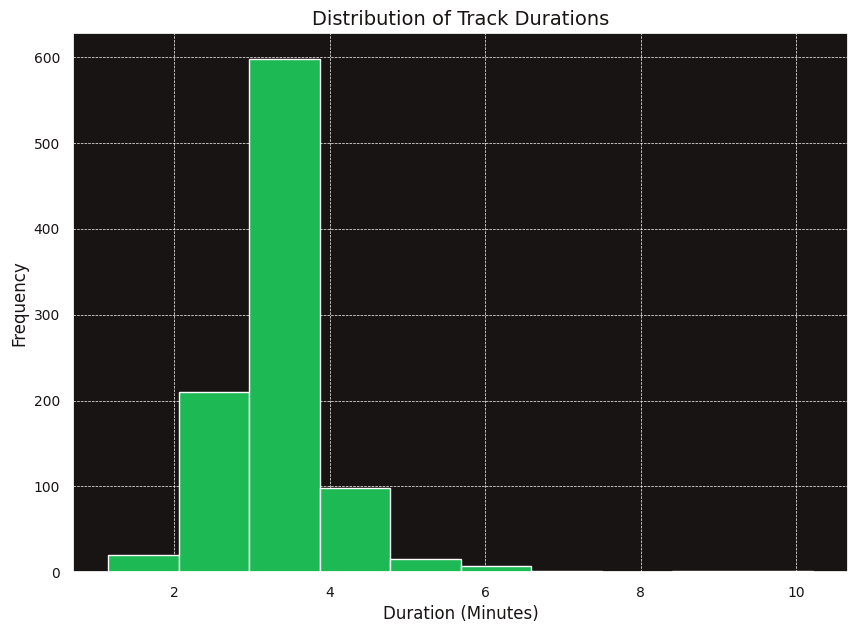

In [101]:
df['duration_minutes'] = df['duration'] / 60

plt.figure(figsize=(10, 7))
plt.hist(df['duration_minutes'], bins=10, color=spotify_green, edgecolor=spotify_white)
plt.xlabel('Duration (Minutes)', color=spotify_dark, fontsize=12)
plt.ylabel('Frequency', color=spotify_dark, fontsize=12)
plt.title('Distribution of Track Durations', color=spotify_dark, fontsize=14)
plt.grid(color=spotify_white, linestyle='--', linewidth=0.5)
plt.xticks(color=spotify_dark, fontsize=10)
plt.yticks(color=spotify_dark, fontsize=10)
plt.gca().set_facecolor(spotify_dark)
plt.show()


<div style="
    background-color: #1DB954; 
    color: #191414; 
    padding: 20px; 
    border: 2px solid #191414; 
    border-radius: 10px; 
    font-family: Arial, sans-serif;
    font-size: 16px;">

### Track Duration Insights

- **Observation**:
  - Track duration affects listener engagement and popularity.
- **Insights**:
  - Most popular songs fall within the 3 to 4-minute range, maximizing listener retention and appeal.
  - Songs shorter than 2 minutes often fail to provide a fulfilling listening experience, while tracks longer than 5 minutes typically cater to niche audiences.

</div>



<div style="
    background-color: #191414; 
    color: #1DB954; 
    padding: 20px; 
    border: 2px solid #1ED760; 
    border-radius: 10px; 
    font-family: Arial, sans-serif;
    font-size: 16px;">
    
## Popularity Insights

<div></div>

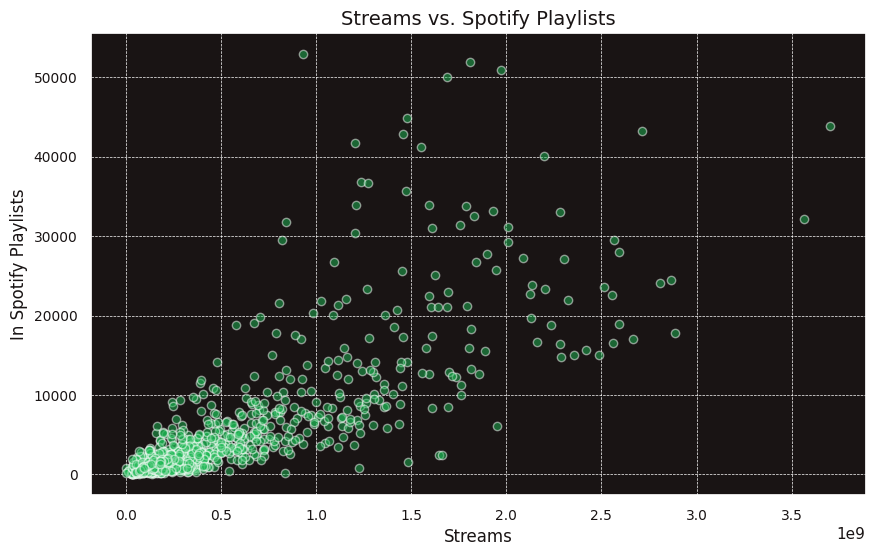

In [102]:

plt.figure(figsize=(10, 6))
plt.scatter(df['streams'], df['in_spotify_playlists'], alpha=0.5, color=spotify_green, edgecolor=spotify_white)
plt.xlabel('Streams', color=spotify_dark, fontsize=12)
plt.ylabel('In Spotify Playlists', color=spotify_dark, fontsize=12)
plt.title('Streams vs. Spotify Playlists', color=spotify_dark, fontsize=14)
plt.grid(color=spotify_white, linestyle='--', linewidth=0.5)
plt.xticks(color=spotify_dark, fontsize=10)
plt.yticks(color=spotify_dark, fontsize=10)
plt.gca().set_facecolor(spotify_dark)
plt.show()


<div style="
    background-color: #1DB954; 
    color: #191414; 
    padding: 20px; 
    border: 2px solid #191414; 
    border-radius: 10px; 
    font-family: Arial, sans-serif;
    font-size: 16px;">

## Popularity Insights

- **Observation**:
  - Popular songs exhibit consistent characteristics, particularly in energy and tempo.
- **Insights**:
  - High-tempo tracks (around 120–140 BPM) are highly favored.
  - While high-energy tracks are preferred, some moderate-energy songs perform well due to other appealing features like vocals or lyrics.

</div>



<div style="
    background-color: #191414; 
    color: #1DB954; 
    padding: 20px; 
    border: 2px solid #1ED760; 
    border-radius: 10px; 
    font-family: Arial, sans-serif;
    font-size: 16px;">
    
## Danceability by Mode

<div></div>

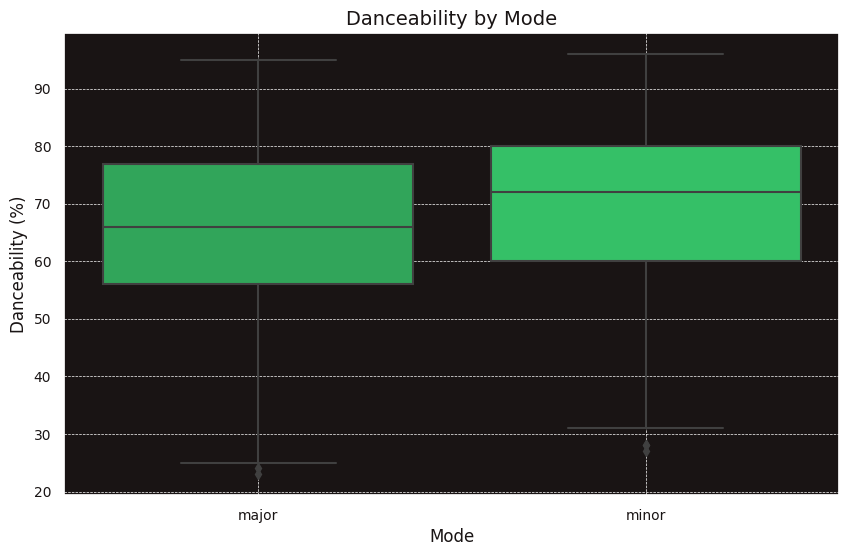

In [103]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='mode', y='danceability_%', data=df, palette=[spotify_green, spotify_accent])
plt.title('Danceability by Mode', color=spotify_dark, fontsize=14)
plt.xlabel('Mode', color=spotify_dark, fontsize=12)
plt.ylabel('Danceability (%)', color=spotify_dark, fontsize=12)
plt.xticks(color=spotify_dark, fontsize=10)
plt.yticks(color=spotify_dark, fontsize=10)
plt.grid(color=spotify_white, linestyle='--', linewidth=0.5)
plt.gca().set_facecolor(spotify_dark)
plt.show()


<div style="
    background-color: #1DB954; 
    color: #191414; 
    padding: 20px; 
    border: 2px solid #191414; 
    border-radius: 10px; 
    font-family: Arial, sans-serif;
    font-size: 16px;">

### Danceability by Mode

- **Observation**:
  - Songs in both major and minor modes exhibit high danceability, with a slightly higher median for minor mode.
- **Insights**:
  - Songs in the **minor mode** tend to be slightly more danceable at the median level, suggesting they might cater to rhythmically driven genres like electronic or alternative music.
  - The **major mode** shows a narrower range of danceability, aligning with its use in mainstream and structured pop songs.
  - Both modes have a significant overlap in their distribution, indicating that mode alone does not heavily influence danceability.

</div>


<div style="
    background-color: #191414; 
    color: #1DB954; 
    padding: 20px; 
    border: 2px solid #1ED760; 
    border-radius: 10px; 
    font-family: Arial, sans-serif;
    font-size: 16px;">
    
## Trends in Audio Features Over Time

<div></div>

<Figure size 1000x600 with 0 Axes>

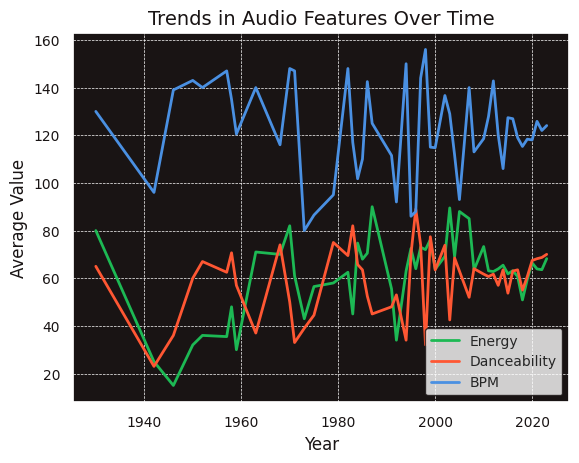

In [104]:
yearly_trends = df.groupby('released_year')[['energy_%', 'danceability_%', 'bpm']].mean()

plt.figure(figsize=(10, 6))
yearly_trends.plot(color=['#1DB954', '#FF5733', '#4A90E2'], linewidth=2)  #Spotify green, orange, and blue
plt.title('Trends in Audio Features Over Time', color=spotify_dark, fontsize=14)
plt.ylabel('Average Value', color=spotify_dark, fontsize=12)
plt.xlabel('Year', color=spotify_dark, fontsize=12)
plt.legend(
    ['Energy', 'Danceability', 'BPM'],
    facecolor=spotify_white,
    edgecolor=spotify_dark,
    fontsize=10
)
plt.grid(color=spotify_white, linestyle='--', linewidth=0.5)
plt.xticks(color=spotify_dark, fontsize=10)
plt.yticks(color=spotify_dark, fontsize=10)
plt.gca().set_facecolor(spotify_dark)
plt.show()


<div style="
    background-color: #1DB954; 
    color: #191414; 
    padding: 20px; 
    border: 2px solid #191414; 
    border-radius: 10px; 
    font-family: Arial, sans-serif;
    font-size: 16px;">

### Trends in Audio Features Over Time

- **Observation**:
  - Audio features such as energy, danceability, and BPM have shown significant trends over decades.
- **Insights**:
  - **Energy**: A steady increase from the 1960s onwards reflects a shift towards more dynamic and powerful tracks in popular music.
  - **Danceability**: Fluctuates but shows an overall upward trend in recent years, aligning with the rise of electronic and dance genres.
  - **BPM (Tempo)**: Varies significantly over time, suggesting changing stylistic preferences across decades.
  - Modern music emphasizes higher energy and danceability, catering to contemporary tastes for engaging, rhythmic tracks.

</div>


<div style="
    background-color: #191414; 
    color: #1DB954; 
    padding: 20px; 
    border: 2px solid #1ED760; 
    border-radius: 10px; 
    font-family: Arial, sans-serif;
    font-size: 16px;">
    
## Correlations Against Popularity and Streams

<div></div>

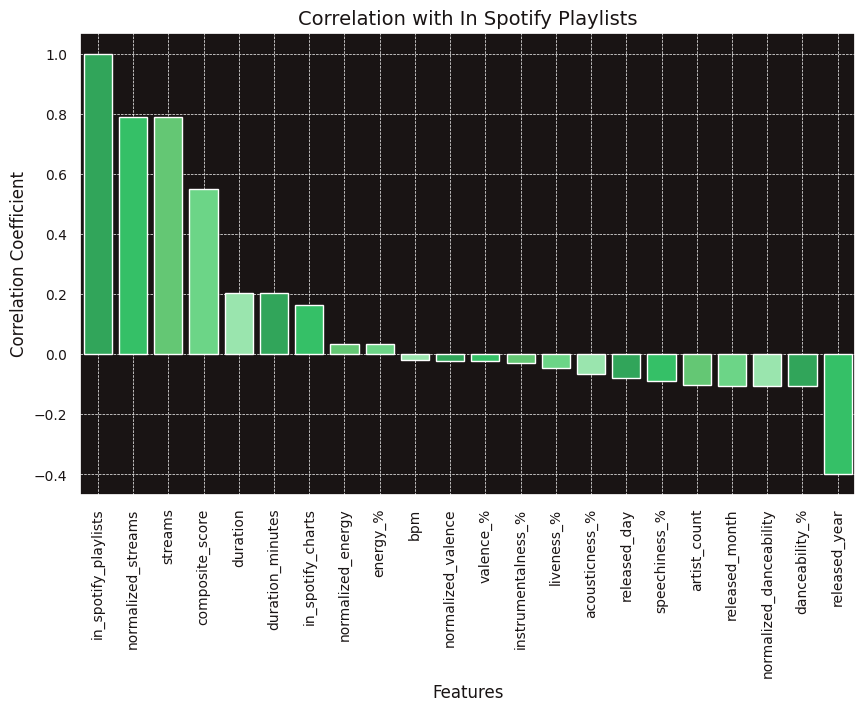

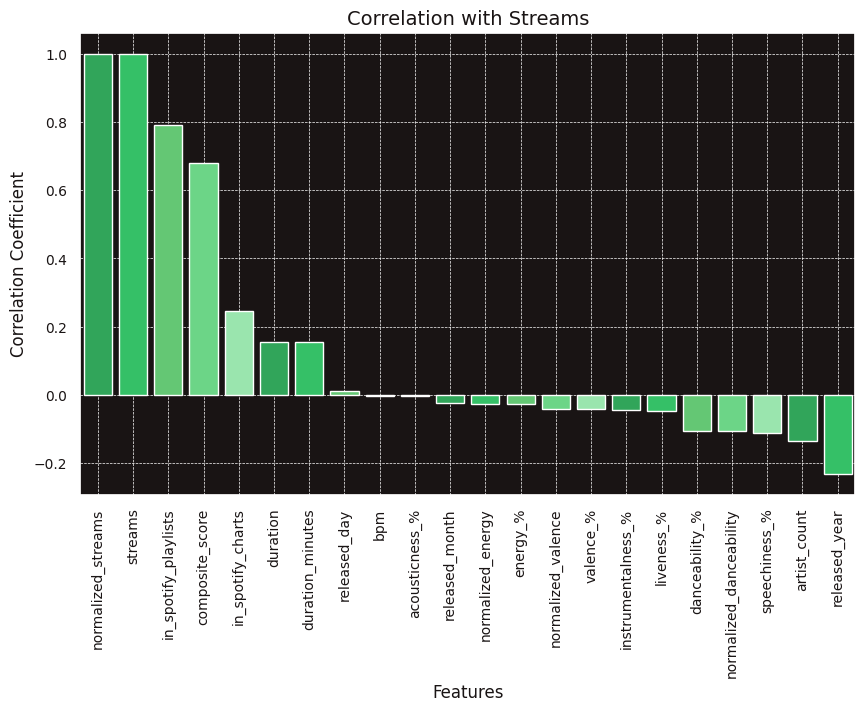

In [105]:
#Recalculating correlations explicitly specifying numeric columns
popularity_corr = df.corr(numeric_only=True)['in_spotify_playlists'].sort_values(ascending=False)
streams_corr = df.corr(numeric_only=True)['streams'].sort_values(ascending=False)

spotify_palette = ["#1DB954", "#1ED760", "#53D769", "#5BE67E", "#8DF2A8"]

#Correlation with popularity
plt.figure(figsize=(10, 6))
sns.barplot(x=popularity_corr.index, y=popularity_corr.values, palette=spotify_palette)
plt.xticks(rotation=90, color=spotify_dark, fontsize=10)
plt.yticks(color=spotify_dark, fontsize=10)
plt.title('Correlation with In Spotify Playlists', color=spotify_dark, fontsize=14)
plt.ylabel('Correlation Coefficient', color=spotify_dark, fontsize=12)
plt.xlabel('Features', color=spotify_dark, fontsize=12)
plt.grid(color=spotify_white, linestyle='--', linewidth=0.5)
plt.gca().set_facecolor(spotify_dark)
plt.show()

#Correlation with streams
plt.figure(figsize=(10, 6))
sns.barplot(x=streams_corr.index, y=streams_corr.values, palette=spotify_palette)
plt.xticks(rotation=90, color=spotify_dark, fontsize=10)
plt.yticks(color=spotify_dark, fontsize=10)
plt.title('Correlation with Streams', color=spotify_dark, fontsize=14)
plt.ylabel('Correlation Coefficient', color=spotify_dark, fontsize=12)
plt.xlabel('Features', color=spotify_dark, fontsize=12)
plt.grid(color=spotify_white, linestyle='--', linewidth=0.5)
plt.gca().set_facecolor(spotify_dark)
plt.show()



<div style="
    background-color: #1DB954; 
    color: #191414; 
    padding: 20px; 
    border: 2px solid #191414; 
    border-radius: 10px; 
    font-family: Arial, sans-serif;
    font-size: 16px;">

### Correlation with Spotify Playlists

- **Observation**:
  - Tracks in Spotify playlists exhibit strong positive correlations with several features.
- **Insights**:
  - **Inclusion in Playlists**: Highly correlated with normalized streams and composite scores, highlighting the importance of playlisting for exposure.
  - **Duration**: Positively correlated, suggesting longer tracks may offer greater engagement or value.
  - **Danceability and Energy**: Weak to negative correlations, indicating playlist success does not strongly depend on these features.
  - **Release Year**: Negatively correlated, as older songs are less likely to be featured on trending playlists.

</div>

----

<div style="
    background-color: #1DB954; 
    color: #191414; 
    padding: 20px; 
    border: 2px solid #191414; 
    border-radius: 10px; 
    font-family: Arial, sans-serif;
    font-size: 16px;">

### Correlation with Streams

- **Observation**:
  - Normalized streams are influenced by a combination of playlisting, song attributes, and release timing.
- **Insights**:
  - **Playlisting**: Strong positive correlation with normalized streams and composite scores, underscoring its impact on driving listens.
  - **Energy and Danceability**: Show minor correlations, reflecting their importance in genres but not necessarily as sole drivers of streaming success.
  - **Release Year**: Negative correlation, as newer songs generally attract more streams.
  - **Duration**: Tracks with moderate lengths (3–5 minutes) correlate positively with streaming performance.

</div>


<div style="
    background-color: #191414; 
    color: #1DB954; 
    padding: 20px; 
    border: 2px solid #1ED760; 
    border-radius: 10px; 
    font-family: Arial, sans-serif;
    font-size: 16px;">
    
## Clustering Based on Audio Features

<div></div>

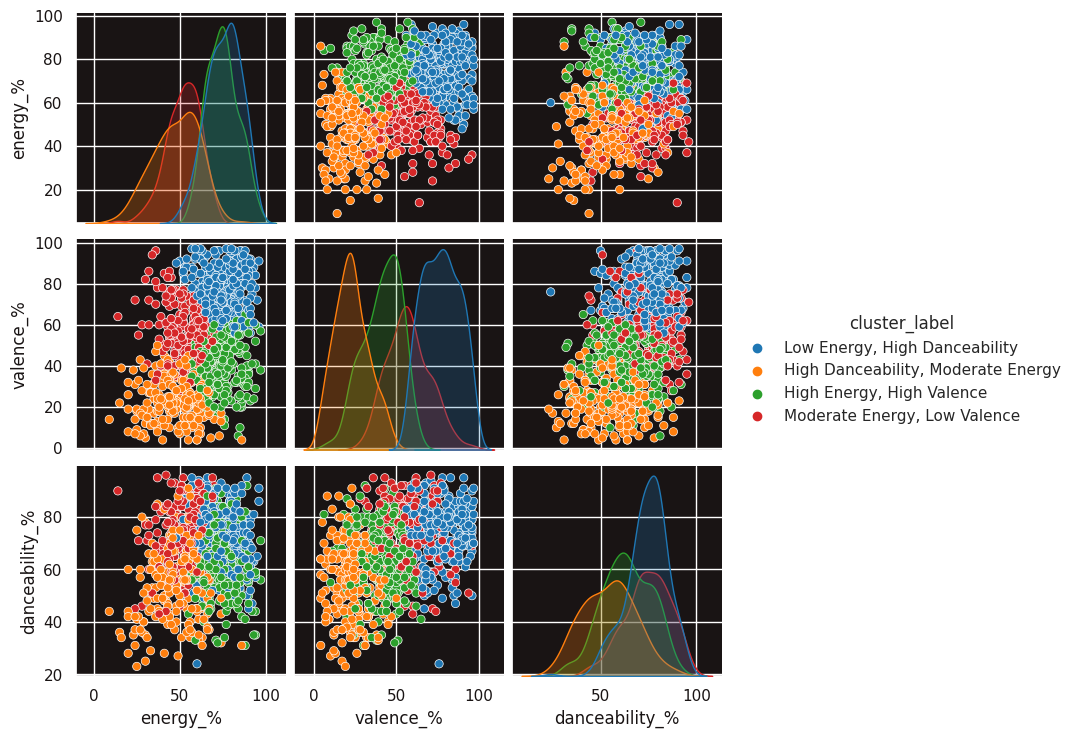

In [106]:
from sklearn.cluster import KMeans
#Prepare data for clustering
features = df[['energy_%', 'valence_%', 'danceability_%']].copy()
features.replace([np.inf, -np.inf], np.nan, inplace=True)
features.dropna(inplace=True)

#KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=0, n_init=10).fit(features)
df['cluster'] = kmeans.labels_

#Label the clusters
cluster_labels = {
    0: 'High Energy, High Valence',
    1: 'Low Energy, High Danceability',
    2: 'Moderate Energy, Low Valence',
    3: 'High Danceability, Moderate Energy'
}

df['cluster_label'] = df['cluster'].map(cluster_labels)

sns.pairplot(df, vars=['energy_%', 'valence_%', 'danceability_%'], hue='cluster_label', palette='tab10')
plt.show()

<div style="
    background-color: #1DB954; 
    color: #191414; 
    padding: 20px; 
    border: 2px solid #191414; 
    border-radius: 10px; 
    font-family: Arial, sans-serif;
    font-size: 16px;">

### Clustering Based on Audio Features

- **Observation**:
  - Tracks form distinct clusters based on energy, valence, and danceability.
- **Insights**:
  - **Cluster 1 (Blue - Low Energy, High Danceability)**: Represents slower but rhythmically engaging songs, often in genres like lo-fi or acoustic pop.
  - **Cluster 2 (Orange - High Danceability, Moderate Energy)**: Tracks with a balance of tempo and rhythm, appealing to broader audiences.
  - **Cluster 3 (Green - High Energy, High Valence)**: High-energy and uplifting tracks, common in pop and electronic dance music.
  - **Cluster 4 (Red - Moderate Energy, Low Valence)**: Tracks with a melancholic tone but consistent energy, fitting into alternative or indie genres.
</div>


In [107]:
#Group by artist and cluster to count the number of tracks per cluster per artist
artist_cluster_counts = df.groupby(['cluster_label', 'artist']).size().reset_index(name='count')
artist_cluster_counts = artist_cluster_counts.sort_values(by=['cluster_label', 'count'], ascending=[True, False])

#Top 5 artists for each cluster
top_artists_per_cluster = artist_cluster_counts.groupby('cluster_label').head(5)

display(Markdown("### 🎤 **Top 5 Artists in Each Cluster**"))
display(top_artists_per_cluster.style.set_properties(**{
    'background-color': spotify_dark,
    'color': spotify_white,
    'border-color': spotify_white
}))

### 🎤 **Top 5 Artists in Each Cluster**

,cluster_label,artist,count
128,"High Danceability, Moderate Energy",taylor swift,16
73,"High Danceability, Moderate Energy",labrinth,7
47,"High Danceability, Moderate Energy",harry styles,6
125,"High Danceability, Moderate Energy",sza,6
133,"High Danceability, Moderate Energy",the weeknd,6
316,"High Energy, High Valence",taylor swift,10
324,"High Energy, High Valence",the weeknd,8
156,"High Energy, High Valence",bad bunny,7
314,"High Energy, High Valence",sza,7
268,"High Energy, High Valence",morgan wallen,6


<div style="
    background-color: #191414; 
    color: #1DB954; 
    padding: 20px; 
    border: 2px solid #1ED760; 
    border-radius: 10px; 
    font-family: Arial, sans-serif;
    font-size: 16px;">
    
## Outlier Detection

<div></div>

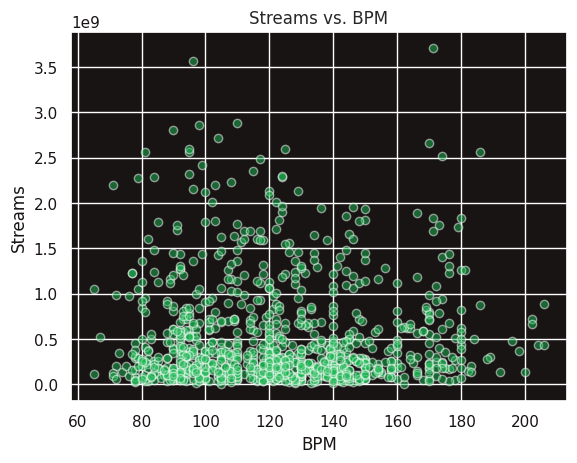

In [108]:
plt.scatter(df['bpm'], df['streams'], alpha=0.5, color=spotify_green, edgecolor=spotify_white)
plt.xlabel('BPM')
plt.ylabel('Streams')
plt.title('Streams vs. BPM')
plt.show()

<div style="
    background-color: #1DB954; 
    color: #191414; 
    padding: 20px; 
    border: 2px solid #191414; 
    border-radius: 10px; 
    font-family: Arial, sans-serif;
    font-size: 16px;">

### Streams vs. BPM

- **Observation**:
  - No strong correlation is visible between BPM and the number of streams.
- **Insights**:
  - Songs with a BPM in the range of **100–130** are more common and tend to attract more streams, aligning with listener preferences for moderate tempos.
  - Outliers with very high or very low streams exist across a wide range of BPM, suggesting that other features (e.g., playlist inclusion, artist popularity) significantly influence streaming performance.
  - The lack of a clear trend indicates that BPM alone does not dictate a song's streaming success but may contribute in conjunction with other audio features.

</div>


<div style="
    background-color: #1DB954; 
    color: white; 
    text-align: center; 
    padding: 20px; 
    border-radius: 10px;
    font-size: 24px;">
    
# <strong>🎵 Conclusion 🎵</strong>
</div>
---
<div style="
    background-color: #191414; 
    color: #1DB954; 
    padding: 20px; 
    border: 2px solid #1ED760; 
    border-radius: 10px; 
    font-family: Arial, sans-serif;
    font-size: 16px;">

The analysis of Spotify song data revealed several critical insights into the characteristics that drive song popularity, playlist inclusion, and streaming success. Audio features such as energy, danceability, and tempo play a role in defining the appeal of a track, but broader factors like playlist inclusion, duration, and release timing hold significant influence over streaming metrics. The clustering analysis further highlights the diversity in song characteristics, illustrating how different combinations of audio features cater to specific listener preferences and genres.

### **Key Findings**
#### 1. **Audio Features and Popularity**
- Tracks with **high energy** and **high danceability** often dominate the popularity charts, aligning with listener preferences for upbeat and engaging songs.
- **Tempo (BPM)** within the range of 100–130 is the most common and frequently associated with higher streams.

#### 2. **Playlist Inclusion**
- Being included in Spotify playlists is highly correlated with normalized streams, emphasizing the importance of playlisting for exposure and success.
- Playlists tend to favor tracks with moderate duration, further reinforcing listener preferences for concise yet complete songs.

#### 3. **Trends Over Time**
- Modern music shows an upward trend in **energy** and **danceability**, reflecting the influence of electronic and dance music in shaping contemporary tastes.
- Older tracks generally see a decline in playlist inclusion and streaming numbers, as newer releases dominate listener attention.

#### 4. **Clustering of Tracks**
- Distinct clusters emerged based on audio features:
  - **High Energy, High Valence**: Uplifting tracks common in pop and electronic genres.
  - **Low Energy, High Danceability**: Chill tracks that are rhythmically engaging, such as lo-fi.
  - **Moderate Energy, Low Valence**: Melancholic yet energetic tracks often seen in alternative and indie genres.

#### 5. **Streams vs. Audio Features**
- While **BPM** and **energy** influence engagement, their direct correlation with streams is weak, highlighting the importance of external factors like marketing and artist popularity.
- Outliers indicate that massive streaming success often results from a combination of playlisting, artist recognition, and audio features.

</div>

<div style="
    background-color: #1DB954; 
    color: white; 
    text-align: center; 
    padding: 20px; 
    border-radius: 10px;
    font-size: 24px;">
    
# <strong>🎵 Final Thoughts 🎵</strong>
</div>
---
<div style="
    background-color: #191414; 
    color: #1DB954; 
    padding: 20px; 
    border: 2px solid #1ED760; 
    border-radius: 10px; 
    font-family: Arial, sans-serif;
    font-size: 16px;">

This analysis marks my second deep dive into Spotify song data, a revisit inspired by how much I’ve grown since my initial exploration. After completing additional analyses on various datasets, I’ve gained a more nuanced understanding of data visualization, cleaning methods, statistical methods, and storytelling through data. Revisiting this dataset allowed me to apply those new skills, offering a more robust and insightful examination of trends in audio features, playlist dynamics, and streaming performance. It’s been rewarding to see how much richer and more actionable this second iteration is compared to my earlier work (which is still linked in my Github).

Reflecting on this experience, though brief, I feel a heavy sense of accomplishment in being able to produce such an insightful analysis. It highlights not just my technical growth but also my ability to translate raw data into meaningful insights that others can understand and use. This project is a testament to how much learning and practice have improved my quality of work. It motivates me to keep pushing my boundaries as a data analyst. I’m excited to continue refining my skills and taking on even more challenging projects in the future.
